Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [x] Choose your target. Which column in your tabular dataset will you predict?
> `price` (engineered feature)
- [x] Is your problem regression or classification?
> regression
- [x] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
> The data is somewhat bimodal, and I'm not sure why yet.
- [x] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
> I don't know which one I want to use, as I don't know which is best for my weird data distribution.
- [x] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
> Some are outliers, but they're meaningful outliers, just based on how at a glance there is visible correlation between price and the other features.
    - Will you do a random split or a time-based split?
> Most likely time-based, but I may change that if time is a useful feature.
- [x] Begin to clean and explore your data.
- [x] Begin to choose which features, if any, to exclude. Would some features "leak" future information?
> None will leak information, and a lot of the features are empty.

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [2]:
import pandas as pd
from numpy import NaN, nanmean
from seaborn import distplot

pd.set_option('display.max_columns', 999)

df = pd.read_csv('../data/pumpkins/pumpkins.csv').drop('Unnamed: 0', axis=1)

df.columns = [c.replace(" ", "_").lower() for c in df.columns]
df.shape

(1757, 25)

In [3]:
df.isnull().sum()

commodity_name        0
city_name             0
type               1712
package               0
variety               5
sub_variety        1461
grade              1757
date                  0
low_price             0
high_price            0
mostly_low          103
mostly_high         103
origin                5
origin_district    1626
item_size           279
color              1041
environment        1757
unit_of_sale       1595
quality            1757
condition          1757
appearance         1757
storage            1757
crop               1757
repack                0
trans_mode         1757
dtype: int64

In [4]:
df['organic'] = df.type == 'Organic'
df['price'] = df[['low_price', 'high_price', 'mostly_low', 'mostly_high']].apply(nanmean, axis=1)
df['variety'] = df.apply(lambda x: x.variety if pd.isna(x.variety) else (
                             x.variety + (
                                 '' if pd.isna(x.sub_variety) else f' {x.sub_variety}'
                             )
                         ), axis=1)
df.date = pd.to_datetime(df.date)
df.item_size = df.item_size.map({
    'sml': 'small',
    'med': 'medium',
    'lge': 'large',
     NaN: NaN,
    'xlge': 'extra large',
    'med-lge': 'medium large',
    'jbo': 'jumbo',
    'exjbo': 'extra jumbo'
})

In [5]:
df = df.drop(['commodity_name', 'grade', 'environment',
              'quality', 'condition', 'appearance',
              'storage', 'crop', 'trans_mode',
              'sub_variety', 'low_price', 'high_price',
              'mostly_low', 'mostly_high', 'type'], axis=1)

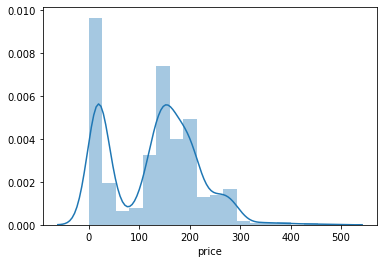

In [6]:
distplot(df.price);

EACH


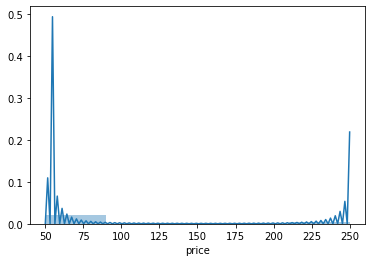

PER BIN


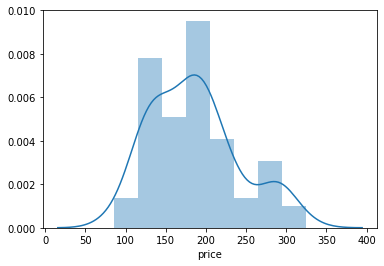

PER LB


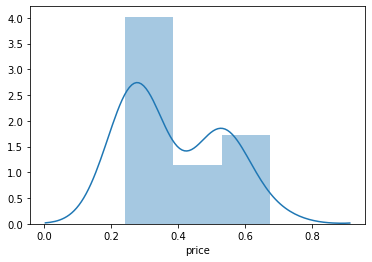

SHELLACKED


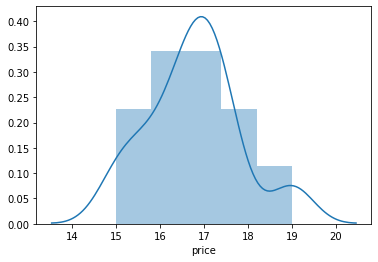

In [7]:
import matplotlib.pyplot as plt
for key, group in df.groupby('unit_of_sale'):
    print(key)
    distplot(group.price)
    plt.show()

In [8]:
df.nunique()

city_name           13
package             15
variety             12
date                57
origin              24
origin_district      5
item_size            7
color                3
unit_of_sale         4
repack               2
organic              2
price              180
dtype: int64

In [9]:
df[df.repack == 'E']

,city_name,package,variety,date,origin,origin_district,item_size,color,unit_of_sale,repack,organic,price
57,BALTIMORE,24 inch bins,NaN,2017-04-29,NaN,NaN,large,NaN,NaN,E,False,275.0
58,BALTIMORE,24 inch bins,NaN,2017-05-06,NaN,NaN,large,NaN,NaN,E,False,275.0
86,BALTIMORE,24 inch bins,CINDERELLA,2017-06-03,NaN,NaN,extra large,NaN,NaN,E,False,380.0
87,BALTIMORE,24 inch bins,CINDERELLA,2017-06-10,NaN,NaN,extra large,NaN,NaN,E,False,380.0
88,BALTIMORE,24 inch bins,CINDERELLA,2017-06-17,NaN,NaN,extra large,NaN,NaN,E,False,380.0
